In [1]:
import torch
import numpy as np
import scipy.io.wavfile as waves
import scipy.fftpack as fourier
import contextlib
import wave
import matplotlib.pyplot as plt

In [2]:
ruta ='audio_ejemplo\palpation801.wav'

In [3]:
audio=ruta
muestreo, sonido = waves.read(audio)
with contextlib.closing(wave.open(audio,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duracion = frames / float(rate)

In [4]:
tamano = np.shape(sonido) 
m = len(tamano)
canales = 1  
if (m>1):  
    canales = tamano[1]

if (canales>1):
        canal = 0
        uncanal = sonido[:,canal] 
else:
    uncanal = sonido

inicia = 0
termina = 10
a = int(inicia*muestreo)
b = int(termina*muestreo)
parte = uncanal[a:b]

dt= 1/muestreo
parte

array([         0,          0,          0, ..., -106741760, -107560960,
       -106610688])

In [5]:
mean = np.mean(parte)
standard_deviation = np.std(parte)
distance_from_mean = np.abs(parte - mean)
max_deviations = 0.75
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = parte[not_outlier]

In [6]:
shift = np.mean(no_outliers)
parte_shift = no_outliers-shift
mult = 100000
parte_mult = mult*parte_shift
n_fft = 2**(13) 

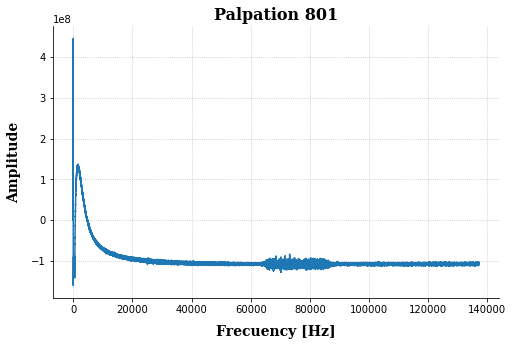

In [7]:
fig = plt.figure(figsize=(8,5))
plt.plot(parte)

ax = plt.gca()
ax.set_title('Palpation 801', color='k',family='serif', fontsize=16, weight='bold')
ax.set_xlabel('Frecuency [Hz]',color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.set_ylabel('Amplitude', color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

### Aquí sirve para generar cuadros de texto dentro del grafico.
#ax.text(5010,24.2,"Material 3",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,23,"Angulo = 70 ",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,21.8,"Velocidad = 66 ",bbox=dict(facecolor="skyblue"),fontsize=10)

#### Para guardar la imagen en .png
#plt.savefig("palpacion 801")

plt.show()

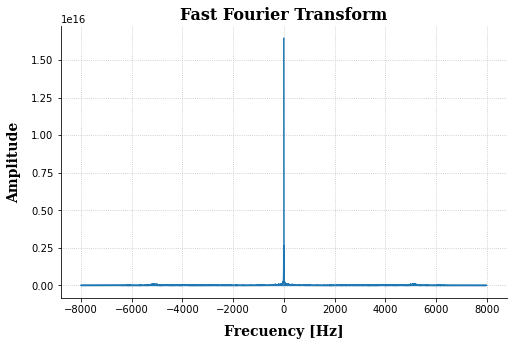

In [8]:
tensor = torch.tensor(parte_mult) 
fft_torch=torch.fft.fft(tensor,n_fft)
freqs = torch.fft.fftfreq(n_fft,dt)
#freqs_plot = torch.fft.fftshift(freqs)
fig = plt.figure(figsize=(8,5))
plt.plot(freqs,np.abs(fft_torch))

ax = plt.gca()
ax.set_title('Fast Fourier Transform', color='k',family='serif', fontsize=16, weight='bold')
ax.set_xlabel('Frecuency [Hz]',color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.set_ylabel('Amplitude', color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)
#ax.text(5010,24.2,"Material 3",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,23,"Angulo = 70 ",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,21.8,"Velocidad = 66 ",bbox=dict(facecolor="skyblue"),fontsize=10)
#plt.savefig("FFT")

plt.show()

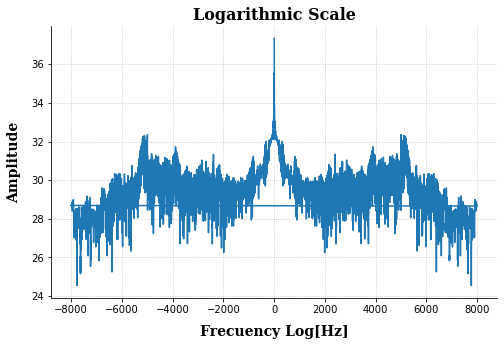

In [9]:
m_fft_torch= np.abs(fft_torch)
eps = 10**(-3)
log_m_fft_torch = np.log(m_fft_torch+eps)
fig = plt.figure(figsize=(8,5))
plt.plot(freqs,log_m_fft_torch)

ax = plt.gca()
ax.set_title('Logarithmic Scale', color='k',family='serif', fontsize=16, weight='bold')
ax.set_xlabel('Frecuency Log[Hz]',color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.set_ylabel('Amplitude', color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)
#ax.text(5010,24.2,"Material 3",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,23,"Angulo = 70 ",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,21.8,"Velocidad = 66 ",bbox=dict(facecolor="skyblue"),fontsize=10)
#plt.savefig("Log")

plt.show()

C:\Users\robin\miniconda3\envs\ailab\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


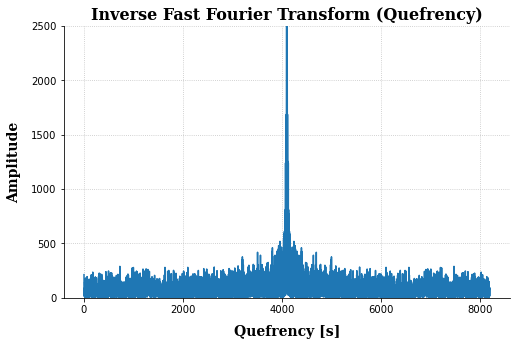

In [10]:
ifft_t= torch.tensor(log_m_fft_torch)
ifft_torch = torch.fft.ifft(ifft_t,n_fft)*muestreo
ceps_plot = torch.fft.fftshift(np.abs(ifft_torch))
fig = plt.figure(figsize=(8,5))
plt.plot(ceps_plot)
plt.ylim([0,2500])


ax = plt.gca()
ax.set_title('Inverse Fast Fourier Transform (Quefrency)', color='k',family='serif', fontsize=16, weight='bold')
ax.set_xlabel('Quefrency [s]',color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.set_ylabel('Amplitude', color='k',family='serif', fontsize=14, weight='bold', labelpad=10)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)
#ax.text(5010,24.2,"Material 3",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,23,"Angulo = 70 ",bbox=dict(facecolor="skyblue"),fontsize=10)
#ax.text(5010,21.8,"Velocidad = 66 ",bbox=dict(facecolor="skyblue"),fontsize=10)
#plt.savefig("IFFT")

plt.show()